# Seattle Airbnb Price Analysis

## Business Understanding

Airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.  
  
My main analysis will be focusing on these discussion:
1. What features affecting the price?
2. --
3. Can we predict the price accurately?

## Data Understanding

The dataset provides various categorical and numerical features. In futher analysis I will pick only pick some of relevant feature to predict the price.

The main process at this stage are:
1. Import libraries
2. Data loading
3. Data cleaning
4. Exploratory data analysis

### Libraries

In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Data loading

In [861]:
df = pd.read_csv('listings.csv')

### Data cleaning

In [862]:
pd.set_option('display.max_columns', None)
df.tail(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/a5974f04-2...,https://a2.muscache.com/im/pictures/a5974f04-2...,https://a2.muscache.com/ac/pictures/a5974f04-2...,https://a2.muscache.com/ac/pictures/a5974f04-2...,52791370,https://www.airbnb.com/users/show/52791370,Virginia,2015-12-30,US,NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/pictures/efc75826-1...,https://a2.muscache.com/ac/pictures/efc75826-1...,NaN,1.0,1.0,['phone'],t,f,"South Laurel Street, Seattle, WA 98178, United...",NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,f,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,$93.00,$450.00,NaN,$250.00,$35.00,2,$20.00,1,7,4 days ago,t,29,59,88,88,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,https://a2.muscache.com/ac/pictures/202e4ad6-b...,https://a2.muscache.com/im/pictures/202e4ad6-b...,https://a2.muscache.com/ac/pictures/202e4ad6-b...,https://a2.muscache.com/ac/pictures/202e4ad6-b...,25522052,https://www.airbnb.com/users/show/25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/25522052/prof...,https://a0.muscache.com/ac/users/25522052/prof...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"43rd Avenue East, Seattle, WA 98112, United St...",NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,f,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$99.00,NaN,NaN,$300.00,$45.00,1,$0.00,3,1125,never,t,30,60,90,179,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,Also our puppy will be boarded away.,NaN,https://a2.m

In [863]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

I am going to filter some relevant features/columns. I take 17 features that I thought will be the most crucial in determining the price.

In [865]:
rel_col = ['id','neighbourhood','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','review_scores_rating','cleaning_fee','security_deposit','extra_people','price']

df = df[rel_col]
df.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,review_scores_rating,cleaning_fee,security_deposit,extra_people,price
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,95.0,NaN,NaN,$5.00,$85.00
1,953595,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,96.0,$40.00,$100.00,$0.00,$150.00
2,3308979,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,97.0,$300.00,"$1,000.00",$25.00,$975.00
3,7421966,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,NaN,NaN,NaN,$0.00,$100.00
4,278830,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,92.0,$125.00,$700.00,$15.00,$450.00


In [866]:
df.isna().sum()*100/df.shape[0]

id                       0.000000
neighbourhood           10.895757
latitude                 0.000000
longitude                0.000000
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
bed_type                 0.000000
amenities                0.000000
square_feet             97.459403
review_scores_rating    16.946045
cleaning_fee            26.977475
security_deposit        51.126244
extra_people             0.000000
price                    0.000000
dtype: float64

**Handling Missing Values :**  
- Remove the columns with more than 50% missing values.
- Replace missing values at numerical type with median.
- Drop the rows with less than 2 percent missing values

In [867]:
# remove columns with more than 50%
df.drop(columns=['square_feet','security_deposit'], inplace=True)

# transform currency to float
col_currency = ['price','cleaning_fee','extra_people']

for item in col_currency:
  df[item] = df[item].str.replace('$','')
  df[item] = df[item].str.replace(',','').astype(float)

# fill columns with median 
fill_col = ['bathrooms','bedrooms','beds','review_scores_rating','cleaning_fee']
for item in fill_col:
  df[item] = df[item].fillna(df[item].median())
  
# neighbourhood seems important and we can not have nan at this.
# however it should fill with accurate value. 
# At the moment, I will just drop rows with neighborhood equal to nan
df.dropna(subset=['neighbourhood'],axis=0, inplace=True)

# drop rows with less than 2 percent missing values
df.dropna(subset=['property_type'],axis=0, inplace=True)

# for the moment lets remove amenities
df.drop(columns=['amenities'],inplace=True)

In [868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3401 non-null   int64  
 1   neighbourhood         3401 non-null   object 
 2   latitude              3401 non-null   float64
 3   longitude             3401 non-null   float64
 4   property_type         3401 non-null   object 
 5   room_type             3401 non-null   object 
 6   accommodates          3401 non-null   int64  
 7   bathrooms             3401 non-null   float64
 8   bedrooms              3401 non-null   float64
 9   beds                  3401 non-null   float64
 10  bed_type              3401 non-null   object 
 11  review_scores_rating  3401 non-null   float64
 12  cleaning_fee          3401 non-null   float64
 13  extra_people          3401 non-null   float64
 14  price                 3401 non-null   float64
dtypes: float64(9), int64(

### Exploratory data analysis

Lets see the correlation of each features (numerical)

<AxesSubplot:>

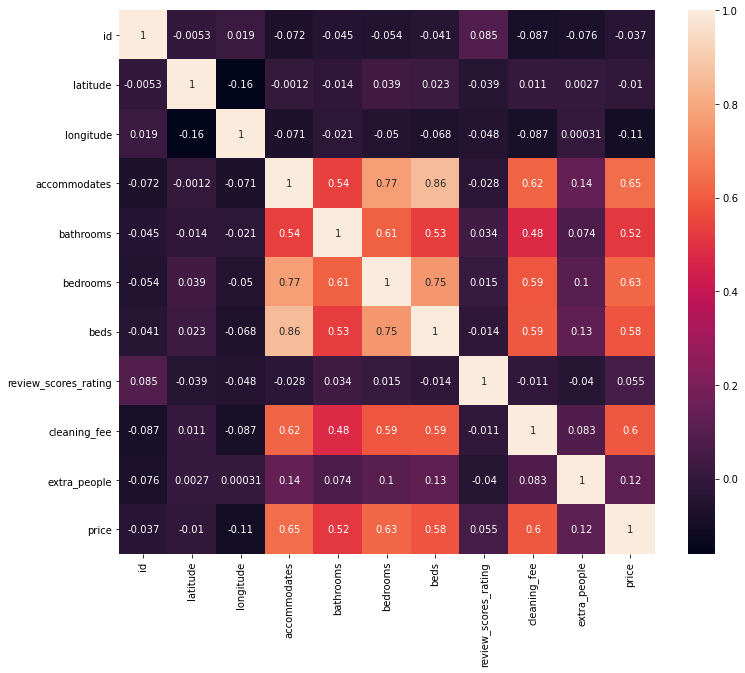

In [869]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

#### Categorical Feature

In [870]:
df_categorical =df.select_dtypes(include=['object'])
df_categorical.head()

,neighbourhood,property_type,room_type,bed_type
0,Queen Anne,Apartment,Entire home/apt,Real Bed
1,Queen Anne,Apartment,Entire home/apt,Real Bed
2,Queen Anne,House,Entire home/apt,Real Bed
3,Queen Anne,Apartment,Entire home/apt,Real Bed
4,Queen Anne,House,Entire home/apt,Real Bed


Text(0.5, 1.0, 'Bed Type')

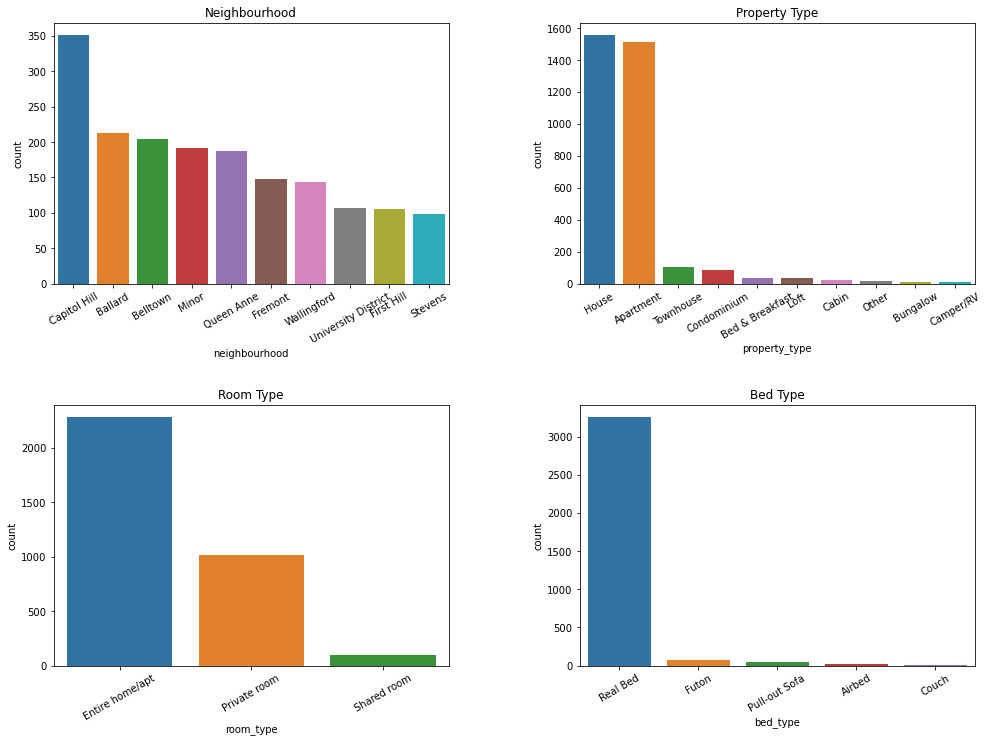

In [871]:
df_neghbourhood = df_categorical.groupby('neighbourhood')['neighbourhood'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False).iloc[:10,:]
df_property_type = df_categorical.groupby('property_type')['property_type'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False).iloc[:10,:]
df_room_type = df_categorical.groupby('room_type')['room_type'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False)
df_bed_type = df_categorical.groupby('bed_type')['bed_type'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.tight_layout(pad=10)

neigh = sns.barplot(ax=axes[0, 0], data=df_neghbourhood, x='neighbourhood', y='count')
neigh.tick_params(axis='x',rotation=30)
neigh.set_title('Neighbourhood')

prop = sns.barplot(ax=axes[0, 1], data=df_property_type, x='property_type', y='count')
prop.tick_params(axis='x',rotation=30)
prop.set_title('Property Type')

room = sns.barplot(ax=axes[1, 0], data=df_room_type, x='room_type', y='count')
room.tick_params(axis='x',rotation=30)
room.set_title('Room Type')

bed = sns.barplot(ax=axes[1, 1], data=df_bed_type, x='bed_type', y='count')
bed.tick_params(axis='x',rotation=30)
bed.set_title('Bed Type')


Text(0.5, 1.0, 'Bed Type')

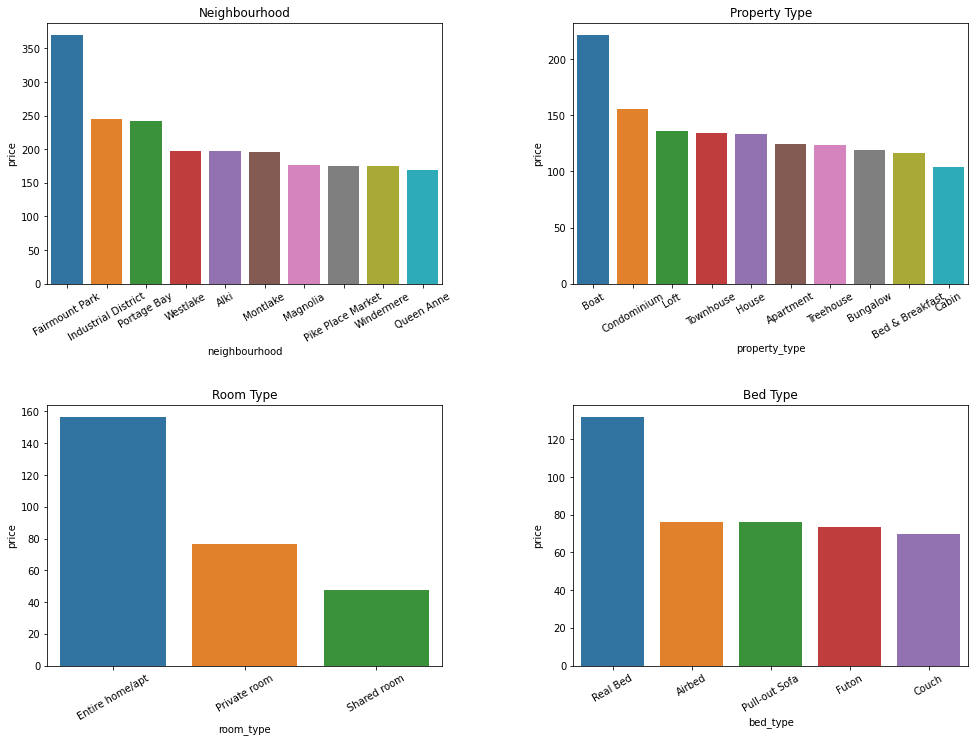

In [872]:
df_neghbourhood_price = df.groupby('neighbourhood').mean().reset_index()[['neighbourhood','price']].sort_values(by='price', ascending=False).iloc[:10,:]
df_property_type_price = df.groupby('property_type').mean().reset_index()[['property_type','price']].sort_values(by='price', ascending=False).iloc[:10,:]
df_room_type_price = df.groupby('room_type').mean().reset_index()[['room_type','price']].sort_values(by='price', ascending=False)
df_bed_type_price = df.groupby('bed_type').mean().reset_index()[['bed_type','price']].sort_values(by='price', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.tight_layout(pad=10)

neigh = sns.barplot(ax=axes[0, 0], data=df_neghbourhood_price, x='neighbourhood', y='price')
neigh.tick_params(axis='x',rotation=30)
neigh.set_title('Neighbourhood')

prop = sns.barplot(ax=axes[0, 1], data=df_property_type_price, x='property_type', y='price')
prop.tick_params(axis='x',rotation=30)
prop.set_title('Property Type')

room = sns.barplot(ax=axes[1, 0], data=df_room_type_price, x='room_type', y='price')
room.tick_params(axis='x',rotation=30)
room.set_title('Room Type')

bed = sns.barplot(ax=axes[1, 1], data=df_bed_type_price, x='bed_type', y='price')
bed.tick_params(axis='x',rotation=30)
bed.set_title('Bed Type')

#### Numerical Feature

## Data Preparation

Encode categorical data

In [873]:
df = pd.get_dummies(df, columns=['neighbourhood','property_type','room_type','bed_type'], prefix = ['ne','pt','rt','bt'])

In [874]:
X = df.drop(columns=['id','price'])
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

In [875]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)

## Evaluation

In [876]:
r2 = r2_score(y_test,pred_reg)
print('R2 score',r2)
print('Mean absolute error',mean_absolute_error(y_test,pred_reg))
print('Mean squared error',mean_squared_error(y_test,pred_reg))

R2 score 0.6506660312370957
Mean absolute error 33.704313627037
Mean squared error 2664.0625403955005


## Conclusion